# Separate analysis of Terrestrial/Giant-type systems

- Analysis of the consolidated data created in the `prep/postprocessing.ipynb` notebook (separated by systems with giant planets (gt) and terrestrial planet-only systems (tr)). 
- Linear regression analysis of sigmag0, metallicity, mass efficiency yields:
    - More giant planets (and GPS) in perturbed case
    - Number of giant planets increases with metallicity
    - Number of terrestrial planets has neg. corr. with metallicity
    - For GPS, mass efficiency increases with metallicity - power law, (both decrease with sigmag0, why?)
    - For TPS, mass efficiency increases with metallicity - power law, but there is no correlation with sigmag0 (why?)
    - Relation between mass efficiency and perturbation may be interesting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
import warnings
warnings.simplefilter('ignore')

In [2]:
fold='../prep/'

In [3]:
dn=pd.read_csv(fold+'proc_no_pert.csv',index_col=None)
dn["gia"]=dn.ngi>0
dl=pd.read_csv(fold+'proc_lo_pert.csv',index_col=None)
dl["gia"]=dl.ngi>0
dh=pd.read_csv(fold+'proc_hi_pert.csv',index_col=None)
dh["gia"]=dh.ngi>0

In [4]:
dn.head()

,Unnamed: 0,ident,com,nplanets,massbudget,massefficiency,sigmag0,md,rc,ms,metal,taugas,qest,ngi,mtr,apert,gia
0,0,3.0,1.081461,10.0,10770.309627,0.576981,90.793337,0.049286,29.539343,0.880114,0.328146,1.644711e+06,8.421395,4.0,12.004623,0.0,True
1,1,5.0,2.932894,12.0,17.882769,0.000488,102.431593,0.118280,38.977428,1.075269,-0.150160,1.014449e+06,5.464831,0.0,17.882769,0.0,False
2,2,6.0,0.110789,12.0,2422.342359,0.060559,75.740878,0.103391,47.343380,0.861595,0.021273,1.790533e+06,4.412694,1.0,29.771089,0.0,True
3,3,8.0,5.740174,9.0,8.166382,0.000163,62.737337,0.161499,58.158928,1.076658,-0.282408,6.017040e+06,4.704798,0.0,8.166382,0.0,False
4,4,13.0,0.172211,13.0,2905.457535,0.051273,178.830700,0.205096,36.672222,1.206445,-0.174039,3.956708e+06,3.998513,1.0,14.220447,0.0,True


In [5]:
dnt=dn[~dn["gia"]]
dlt=dl[~dl["gia"]]
dht=dh[~dh["gia"]]
dng=dn[dn["gia"]]
dlg=dl[dl["gia"]]
dhg=dh[dh["gia"]]

In [199]:
dng['logeff']=np.log10(dng.massefficiency)
dlg['logeff']=np.log10(dlg.massefficiency)
dhg['logeff']=np.log10(dhg.massefficiency)
dnt['logeff']=np.log10(dnt.massefficiency)
dlt['logeff']=np.log10(dlt.massefficiency)
dht['logeff']=np.log10(dht.massefficiency)
dng['logcom']=np.log10(dng.com)
dlg['logcom']=np.log10(dlg.com)
dhg['logcom']=np.log10(dhg.com)
dnt['logcom']=np.log10(dnt.com)
dlt['logcom']=np.log10(dlt.com)
dht['logcom']=np.log10(dht.com)

In [7]:
print("***************************************")
print("Total systems                  : "+str(len(dn)))
print("***************************************")
print("Total planets - no             : "+str(dn.nplanets.sum().astype(int)))
print("Giant planets - no             : "+str(dn.ngi.sum().astype(int)))
print("Systems with giant planets - no: "+str(dn.gia.sum()))
print("***************************************")

print("Total planets - lo             : "+str(dl.nplanets.sum().astype(int)))
print("Giant planets - lo             : "+str(dl.ngi.sum().astype(int)))
print("Systems with giant planets - lo: "+str(dl.gia.sum()))
print("***************************************")
print("Total planets - hi             : "+str(dh.nplanets.sum().astype(int)))
print("Giant planets - hi             : "+str(dh.ngi.sum().astype(int)))
print("Systems with giant planets - hi: "+str(dh.gia.sum()))
print("***************************************")


***************************************
Total systems                  : 1221
***************************************
Total planets - no             : 15887
Giant planets - no             : 330
Systems with giant planets - no: 268
***************************************
Total planets - lo             : 15732
Giant planets - lo             : 374
Systems with giant planets - lo: 306
***************************************
Total planets - hi             : 15441
Giant planets - hi             : 388
Systems with giant planets - hi: 309
***************************************


In [8]:
# 15% more systems w giant planets in perturbed case
100*(dh.gia.sum()-dn.gia.sum())/dn.gia.sum()

15.298507462686567

In [9]:
# 18% more giant planets in perturbed case
100*(dh.ngi.sum()-dn.ngi.sum())/dn.ngi.sum()

17.575757575757574

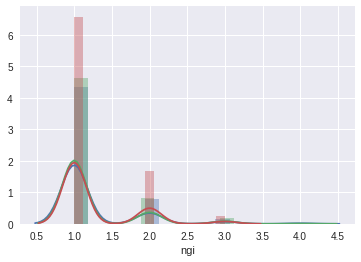

In [10]:
# more giant planets if there are perturbations
sns.distplot(dng.ngi)
sns.distplot(dlg.ngi)
sns.distplot(dhg.ngi)

(array([ 0.77346278,  0.197411  ,  0.02912621,  0.        ]),
 array([1, 2, 3, 4, 5]),
 <a list of 4 Patch objects>)

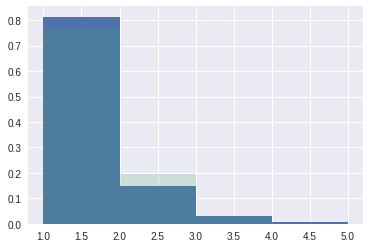

In [11]:
# 5% more chance to have 2 instead of 1 giant planet in the perturbed case
plt.hist(dng.ngi,normed=True,bins=[1,2,3,4,5])
#plt.hist(dlg.ngi,normed=True,bins=[1,2,3,4,5],alpha=0.2)
plt.hist(dhg.ngi,normed=True,bins=[1,2,3,4,5],alpha=0.2)

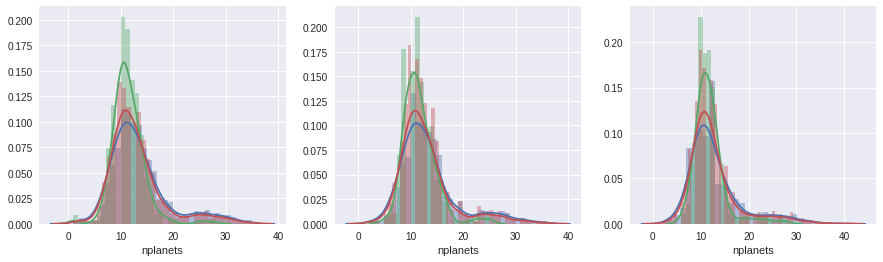

In [361]:
var='nplanets'
fig=plt.figure(figsize=(15,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.distplot(dnt[var],ax=ax1)
sns.distplot(dng[var],ax=ax1)
sns.distplot(dn[var],ax=ax1)
sns.distplot(dlt[var],ax=ax2)
sns.distplot(dlg[var],ax=ax2)
sns.distplot(dl[var],ax=ax2)
sns.distplot(dht[var],ax=ax3)
sns.distplot(dhg[var],ax=ax3)
sns.distplot(dh[var],ax=ax3)

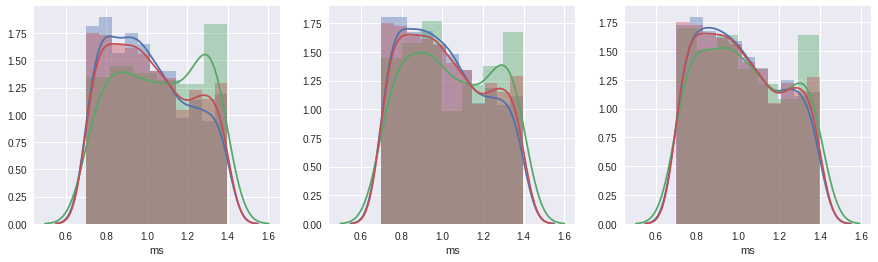

In [376]:
var='ms'
fig=plt.figure(figsize=(15,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.distplot(dnt[var],ax=ax1)
sns.distplot(dng[var],ax=ax1)
sns.distplot(dn[var],ax=ax1)
sns.distplot(dlt[var],ax=ax2)
sns.distplot(dlg[var],ax=ax2)
sns.distplot(dl[var],ax=ax2)
sns.distplot(dht[var],ax=ax3)
sns.distplot(dhg[var],ax=ax3)
sns.distplot(dh[var],ax=ax3)

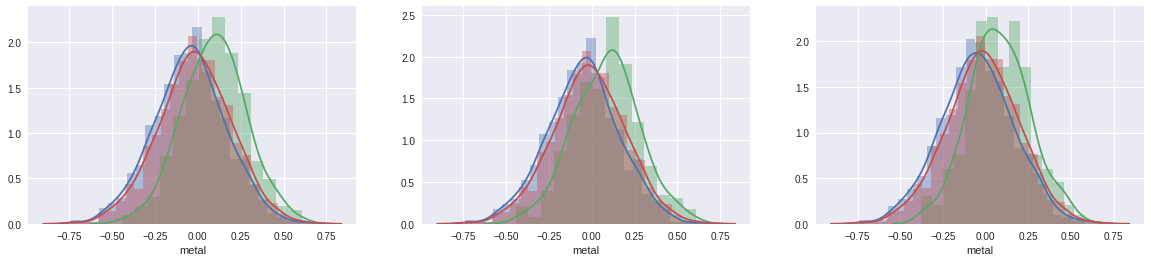

In [367]:
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

sns.distplot(dnt.metal,ax=ax1)
sns.distplot(dng.metal,ax=ax1)
sns.distplot(dn.metal,ax=ax1)
sns.distplot(dlt.metal,ax=ax2)
sns.distplot(dlg.metal,ax=ax2)
sns.distplot(dl.metal,ax=ax2)
sns.distplot(dht.metal,ax=ax3)
sns.distplot(dhg.metal,ax=ax3)
sns.distplot(dh.metal,ax=ax3)


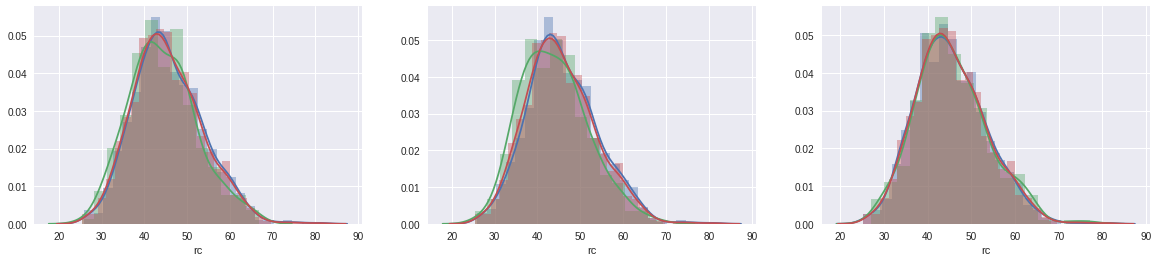

In [368]:
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

sns.distplot(dnt.rc,ax=ax1)
sns.distplot(dng.rc,ax=ax1)
sns.distplot(dn.rc,ax=ax1)
sns.distplot(dlt.rc,ax=ax2)
sns.distplot(dlg.rc,ax=ax2)
sns.distplot(dl.rc,ax=ax2)
sns.distplot(dht.rc,ax=ax3)
sns.distplot(dhg.rc,ax=ax3)
sns.distplot(dh.rc,ax=ax3)

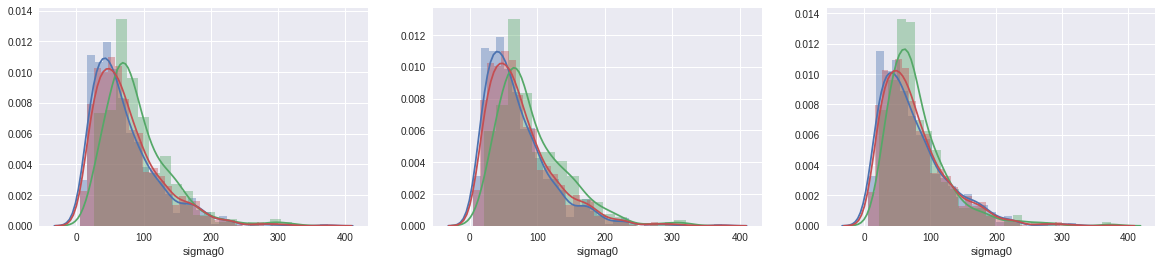

In [369]:
var='sigmag0'
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.distplot(dnt[var],ax=ax1)
sns.distplot(dng[var],ax=ax1)
sns.distplot(dn[var],ax=ax1)
sns.distplot(dlt[var],ax=ax2)
sns.distplot(dlg[var],ax=ax2)
sns.distplot(dl[var],ax=ax2)
sns.distplot(dht[var],ax=ax3)
sns.distplot(dhg[var],ax=ax3)
sns.distplot(dh[var],ax=ax3)



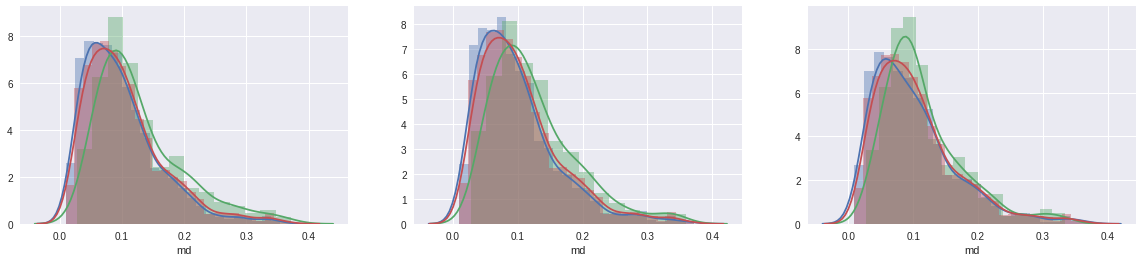

In [370]:
var='md'
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.distplot(dnt[var],ax=ax1)
sns.distplot(dng[var],ax=ax1)
sns.distplot(dn[var],ax=ax1)
sns.distplot(dlt[var],ax=ax2)
sns.distplot(dlg[var],ax=ax2)
sns.distplot(dl[var],ax=ax2)
sns.distplot(dht[var],ax=ax3)
sns.distplot(dhg[var],ax=ax3)
sns.distplot(dh[var],ax=ax3)


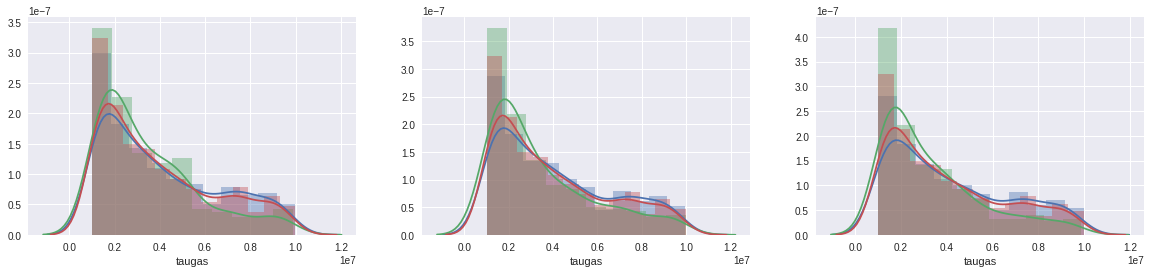

In [371]:
var='taugas'
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.distplot(dnt[var],ax=ax1)
sns.distplot(dng[var],ax=ax1)
sns.distplot(dn[var],ax=ax1)
sns.distplot(dlt[var],ax=ax2)
sns.distplot(dlg[var],ax=ax2)
sns.distplot(dl[var],ax=ax2)
sns.distplot(dht[var],ax=ax3)
sns.distplot(dhg[var],ax=ax3)
sns.distplot(dh[var],ax=ax3)


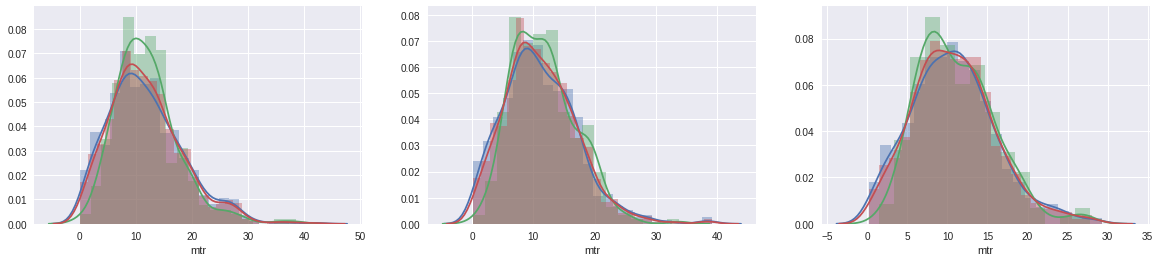

In [372]:
var='mtr'
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.distplot(dnt[var],ax=ax1)
sns.distplot(dng[var],ax=ax1)
sns.distplot(dn[var],ax=ax1)
sns.distplot(dlt[var],ax=ax2)
sns.distplot(dlg[var],ax=ax2)
sns.distplot(dl[var],ax=ax2)
sns.distplot(dht[var],ax=ax3)
sns.distplot(dhg[var],ax=ax3)
sns.distplot(dh[var],ax=ax3)

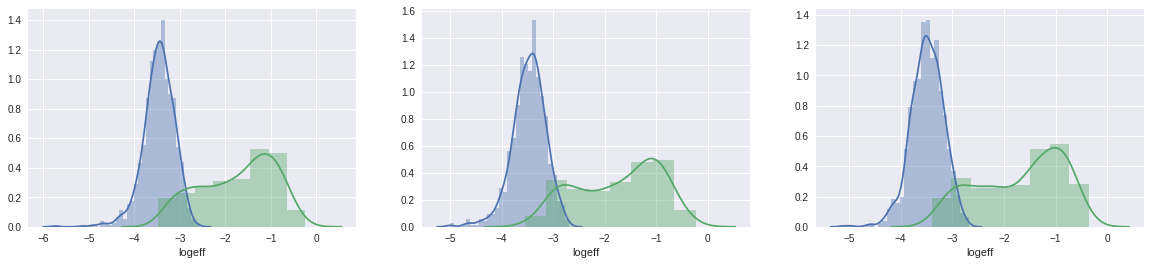

In [374]:
var='logeff'
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.distplot(dnt[var],ax=ax1)
sns.distplot(dng[var],ax=ax1)
sns.distplot(dlt[var],ax=ax2)
sns.distplot(dlg[var],ax=ax2)
sns.distplot(dht[var],ax=ax3)
sns.distplot(dhg[var],ax=ax3)

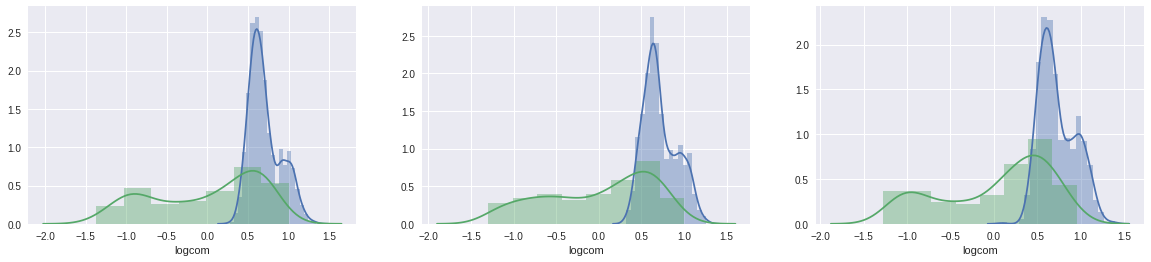

In [258]:
var='logcom'
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.distplot(dnt[var],ax=ax1)
sns.distplot(dng[var],ax=ax1)
sns.distplot(dlt[var],ax=ax2)
sns.distplot(dlg[var],ax=ax2)
sns.distplot(dht[var],ax=ax3)
sns.distplot(dhg[var],ax=ax3)

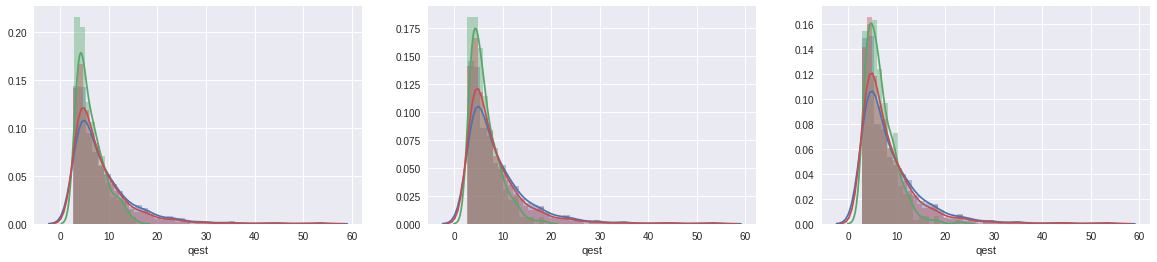

In [375]:
var='qest'
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.distplot(dnt[var],ax=ax1)
sns.distplot(dng[var],ax=ax1)
sns.distplot(dn[var],ax=ax1)
sns.distplot(dlt[var],ax=ax2)
sns.distplot(dlg[var],ax=ax2)
sns.distplot(dl[var],ax=ax2)
sns.distplot(dht[var],ax=ax3)
sns.distplot(dhg[var],ax=ax3)
sns.distplot(dh[var],ax=ax3)

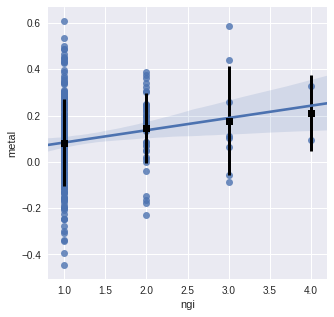

In [12]:
# number of giant planets per system correlates with metallicity
plt.figure(figsize=(5,5))
linp=np.unique(dng.ngi)
eff=np.array([dng.metal[dng.ngi==i].mean() for i in linp])
seff=np.array([dng.metal[dng.ngi==i].std() for i in linp])
plt.errorbar(linp,eff,seff,fmt='sk',elinewidth=3)
sns.regplot(dng.ngi,dng.metal)

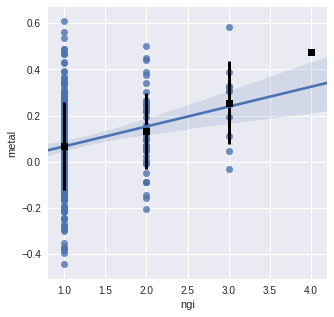

In [13]:
# number of giant planets per system correlates with metallicity
plt.figure(figsize=(5,5))
linp=np.unique(dlg.ngi)
eff=np.array([dlg.metal[dlg.ngi==i].mean() for i in linp])
seff=np.array([dlg.metal[dlg.ngi==i].std() for i in linp])
plt.errorbar(linp,eff,seff,fmt='sk',elinewidth=3)
sns.regplot(dlg.ngi,dlg.metal)

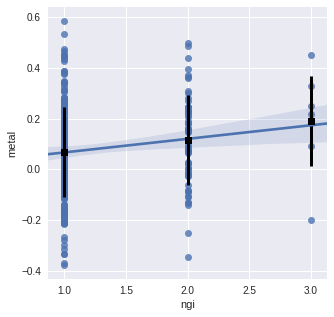

In [14]:
# number of giant planets per system correlates with metallicity
plt.figure(figsize=(5,5))
linp=np.unique(dhg.ngi)
eff=np.array([dhg.metal[dhg.ngi==i].mean() for i in linp])
seff=np.array([dhg.metal[dhg.ngi==i].std() for i in linp])
plt.errorbar(linp,eff,seff,fmt='sk',elinewidth=3)
sns.regplot(dhg.ngi,dhg.metal)

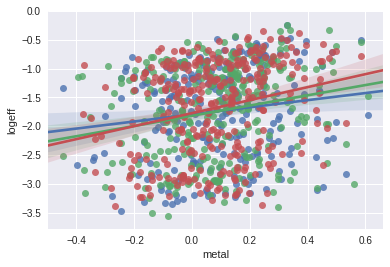

In [15]:
# higher metallicity, higher mass efficiency for gps (pearson R around 0.2)
# worse correlation for no-perturbation case
sns.regplot(x="metal", y="logeff", data=dng)
sns.regplot(x="metal", y="logeff", data=dlg)
sns.regplot(x="metal", y="logeff", data=dhg)
#sns.jointplot(x="metal", y="logeff", data=dlg)
#sns.jointplot(x="metal", y="logeff", data=dhg)

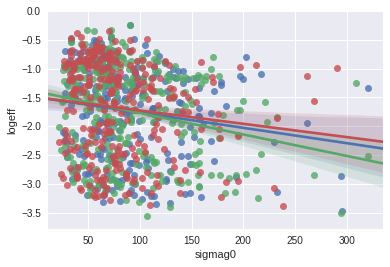

In [16]:
# higher sigmag0, lower mass efficiency for giant planetary systems
sns.regplot(x="sigmag0", y="logeff", data=dng)
sns.regplot(x="sigmag0", y="logeff", data=dlg)
sns.regplot(x="sigmag0", y="logeff", data=dhg)

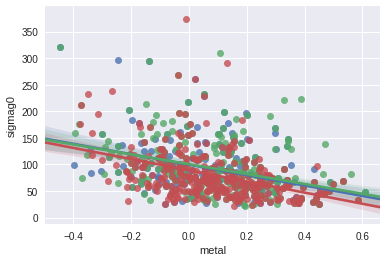

In [17]:
# higher metallicity, lower sigmag0 for gps
sns.regplot(x="metal", y="sigmag0", data=dng)
sns.regplot(x="metal", y="sigmag0", data=dlg)
sns.regplot(x="metal", y="sigmag0", data=dhg)

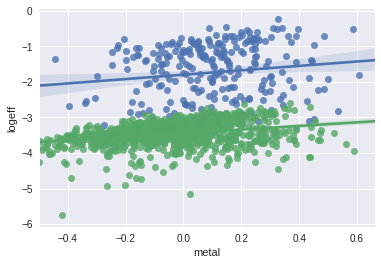

In [18]:
# much higher efficiencies for gps than for tps
sns.regplot(dng.metal,dng.logeff)
sns.regplot(dnt.metal,dnt.logeff)

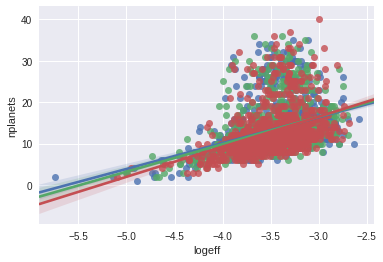

In [19]:
# number of terrestrial planets per system correlates with mass efficiency (pearson R near 0.4) for tps
sns.regplot(x="logeff", y="nplanets", data=dnt)
sns.regplot(x="logeff", y="nplanets", data=dlt)
sns.regplot(x="logeff", y="nplanets", data=dht)

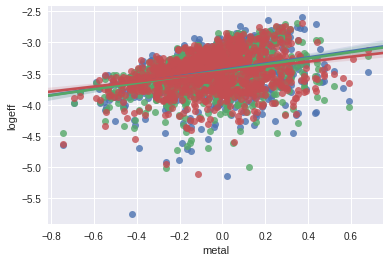

In [20]:
# higher metallicity, higher mass efficiency for tps
sns.regplot(x="metal", y="logeff", data=dnt)
sns.regplot(x="metal", y="logeff", data=dlt)
sns.regplot(x="metal", y="logeff", data=dht)

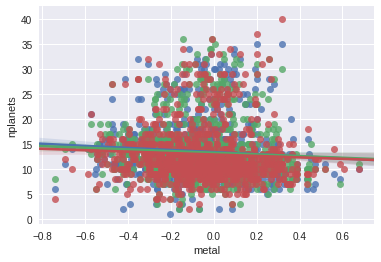

In [21]:
# higher metallicity, higher mass efficiency for tps
sns.regplot(x="metal", y="nplanets", data=dnt)
sns.regplot(x="metal", y="nplanets", data=dlt)
sns.regplot(x="metal", y="nplanets", data=dht)

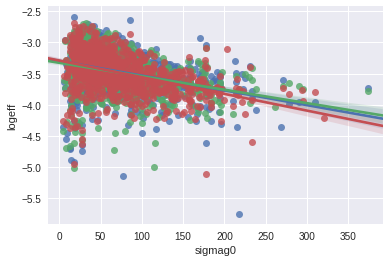

In [22]:
# higher sigmag0, lower mass efficiency for terrestrial planetary systems
sns.regplot(x="sigmag0", y="logeff", data=dnt)
sns.regplot(x="sigmag0", y="logeff", data=dlt)
sns.regplot(x="sigmag0", y="logeff", data=dht)

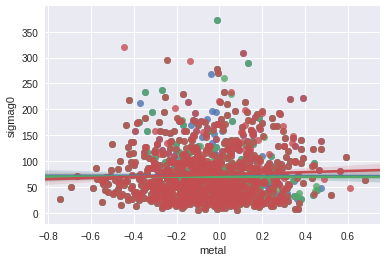

In [23]:
# no correlation between metallicity and sigmag0 for tps
sns.regplot(x="metal", y="sigmag0", data=dnt)
sns.regplot(x="metal", y="sigmag0", data=dlt)
sns.regplot(x="metal", y="sigmag0", data=dht)

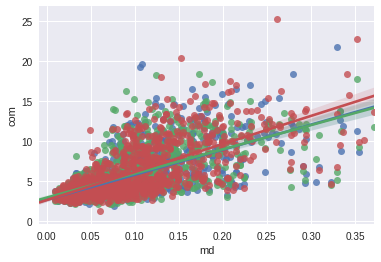

In [387]:
# no correlation between metallicity and sigmag0 for tps
sns.regplot(x="md", y="com", data=dnt)
sns.regplot(x="md", y="com", data=dlt)
sns.regplot(x="md", y="com", data=dht)

In [24]:
import ipyvolume as ipv
import ipywidgets as widgets

In [341]:
fig = ipv.figure()
scatter = ipv.scatter(dnt.ms, dnt.com, dnt.nplanets, marker='sphere')
ipv.xlabel("ms")
ipv.ylabel("com")
ipv.zlabel("nplanets")

ipv.show()

In [77]:
fig2 = ipv.figure()
scatter = ipv.scatter(dnt.metal, dnt.logeff, dnt.nplanets, marker='sphere')
ipv.xlabel("[Fe/H]")
ipv.ylabel("log(eff)")
ipv.zlabel("nplanets")

ipv.show()


In [49]:
scatter.size = 10
slider = widgets.FloatSlider(min=0.0, max=10, step=0.1)
widgets.jslink((scatter, 'size'), (slider, 'value'))
slider

FloatSlider(value=0.0, max=10.0)

In [347]:
from scipy.stats import gaussian_kde
from scipy.special import erf
current_palette = sns.color_palette()

def CONTOURP(x, y, sig=[2.,1.],N=200):

    x1,x2=0,x.max()+1
    y1,y2=0,y.max()+1
    if y.min() <= 0:
        y1=y.min()-1
    if x.min() <= 0:
        x1=x.min()-1
    
    xx = np.linspace(x1, x2, N)
    yy = np.linspace(y1, y2, N)

    XX, YY = np.meshgrid(xx, yy)
    values = np.vstack([x, y])
    positions = np.vstack([XX.ravel(), YY.ravel()])
    kernel = gaussian_kde(values)
    f = np.reshape(kernel(positions).T, XX.shape)

    PCT = 1.0 - np.cumsum(np.sort(f.ravel()))/np.sum(f)
    NN = np.sort(f.ravel())
    SO = [ ]
    for s in sig:
        SO += [NN[(np.abs(PCT - erf(s/np.sqrt(2.0)))).argmin()]]

    return xx,yy,f,SO

In [343]:
def kdesigplt(dat,var1,var2):
    plv=[var1,var2]
    X=dat[plv[0]]
    Y=dat[plv[1]]
    Xmesh,Ymesh,kern,lev=CONTOURP(X,Y)
    g=sns.jointplot(X,Y,kind='kde', n_levels=50)
    g.plot_joint(plt.scatter, c="k", s=30, alpha=0.2, linewidth=1, marker="+")
    g.ax_joint.legend_.remove()
    plt.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[0]],linestyles=('dashed','solid'))


In [320]:
def kdesigplot(dat,var1,var2,ax):
    plv=[var1,var2]
    X=dat[plv[0]]
    Y=dat[plv[1]]
    Xmesh,Ymesh,kern,lev=CONTOURP(X,Y)
    g=sns.kdeplot(X,Y,cmap='Blues',shade=True,ax=ax)
    ax.scatter(X,Y, c="k", s=30, alpha=0.2, linewidth=1, marker="+")
#    g.plot_joint(ax.scatter, c="k", s=30, alpha=0.2, linewidth=1, marker="+")
#    g.ax_joint.legend_.remove()
    ax.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[0]],linestyles=('dashed','solid'))


(0, 20)

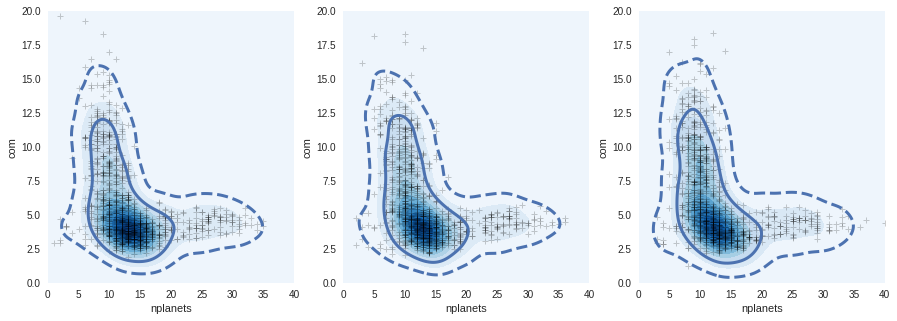

In [386]:
var1='nplanets'
var2='com'
xli=(0,40)
yli=(0,20)
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
kdesigplot(dnt,var1,var2,ax1)
ax1.set_xlim(xli)
ax1.set_ylim(yli)
kdesigplot(dlt,var1,var2,ax2)
ax2.set_xlim(xli)
ax2.set_ylim(yli)
kdesigplot(dht,var1,var2,ax3)
ax3.set_xlim(xli)
ax3.set_ylim(yli)

(0, 20)

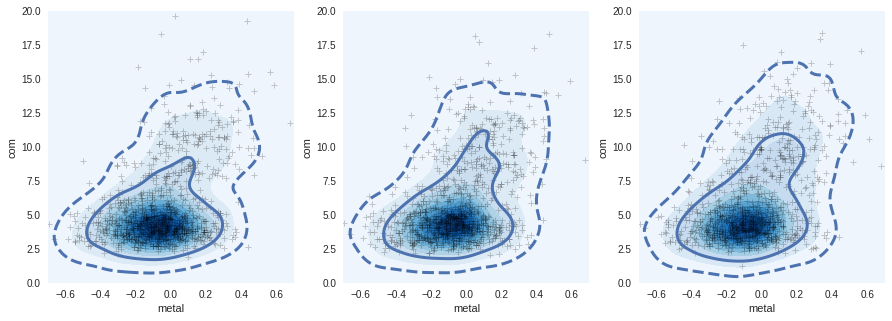

In [394]:
var1='metal'
var2='com'
xli=(-0.7,0.7)
yli=(0,20)
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
kdesigplot(dnt,var1,var2,ax1)
ax1.set_xlim(xli)
ax1.set_ylim(yli)
kdesigplot(dlt,var1,var2,ax2)
ax2.set_xlim(xli)
ax2.set_ylim(yli)
kdesigplot(dht,var1,var2,ax3)
ax3.set_xlim(xli)
ax3.set_ylim(yli)

(-2, 1.5)

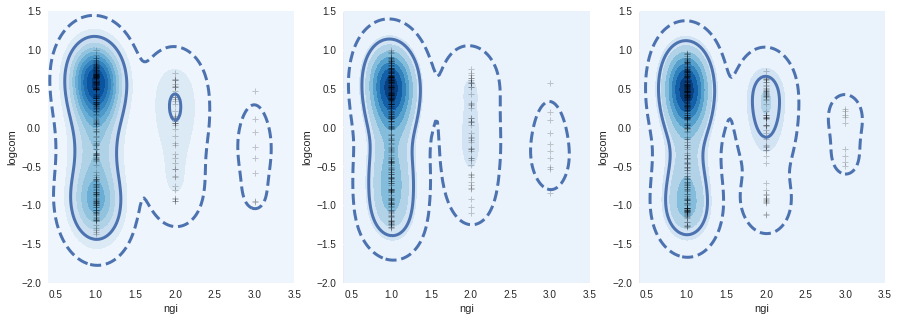

In [334]:
var1='ngi'
var2='logcom'
xli=(0.4,3.5)
yli=(-2,1.5)
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
kdesigplot(dng,var1,var2,ax1)
ax1.set_xlim(xli)
ax1.set_ylim(yli)
kdesigplot(dlg,var1,var2,ax2)
ax2.set_xlim(xli)
ax2.set_ylim(yli)
kdesigplot(dhg,var1,var2,ax3)
ax3.set_xlim(xli)
ax3.set_ylim(yli)

(0, 40)

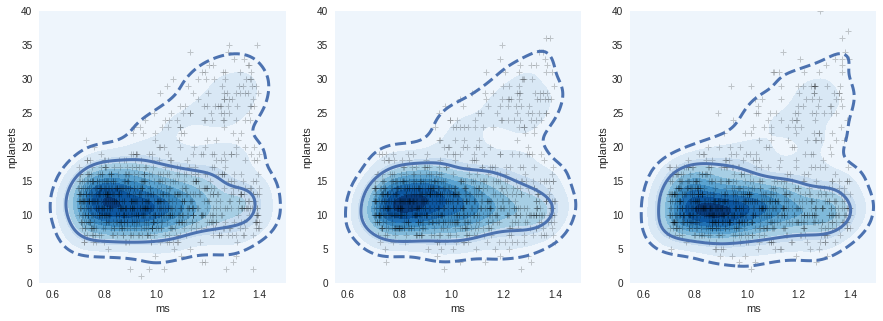

In [337]:
var1='ms'
var2='nplanets'
xli=(0.55,1.5)
yli=(0,40)
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
kdesigplot(dnt,var1,var2,ax1)
ax1.set_xlim(xli)
ax1.set_ylim(yli)
kdesigplot(dlt,var1,var2,ax2)
ax2.set_xlim(xli)
ax2.set_ylim(yli)
kdesigplot(dht,var1,var2,ax3)
ax3.set_xlim(xli)
ax3.set_ylim(yli)

(0, 0.4)

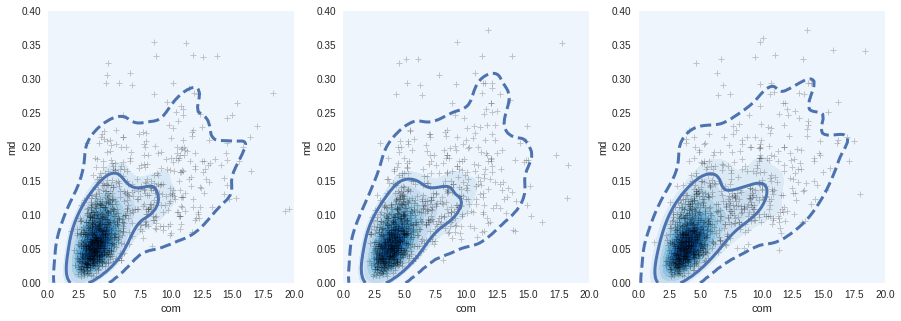

In [379]:
var1='com'
var2='md'
xli=(0,20)
yli=(0,0.4)
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
kdesigplot(dnt,var1,var2,ax1)
ax1.set_xlim(xli)
ax1.set_ylim(yli)
kdesigplot(dlt,var1,var2,ax2)
ax2.set_xlim(xli)
ax2.set_ylim(yli)
kdesigplot(dht,var1,var2,ax3)
ax3.set_xlim(xli)
ax3.set_ylim(yli)

(0, 20)

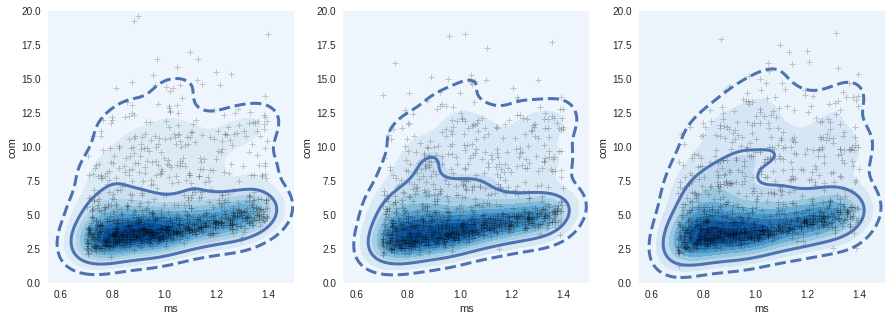

In [391]:
var1='ms'
var2='com'
xli=(0.55,1.5)
yli=(0,20)
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
kdesigplot(dnt,var1,var2,ax1)
ax1.set_xlim(xli)
ax1.set_ylim(yli)
kdesigplot(dlt,var1,var2,ax2)
ax2.set_xlim(xli)
ax2.set_ylim(yli)
kdesigplot(dht,var1,var2,ax3)
ax3.set_xlim(xli)
ax3.set_ylim(yli)

(0, 34)

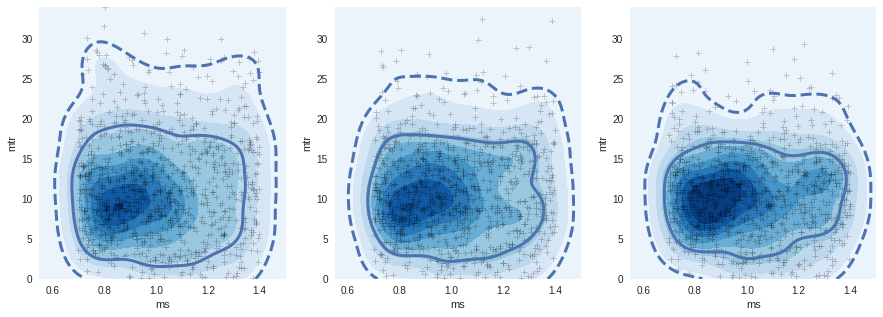

In [340]:
var1='ms'
var2='mtr'
xli=(0.55,1.5)
yli=(0,34)
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
kdesigplot(dnt,var1,var2,ax1)
ax1.set_xlim(xli)
ax1.set_ylim(yli)
kdesigplot(dlt,var1,var2,ax2)
ax2.set_xlim(xli)
ax2.set_ylim(yli)
kdesigplot(dht,var1,var2,ax3)
ax3.set_xlim(xli)
ax3.set_ylim(yli)

(0, 34)

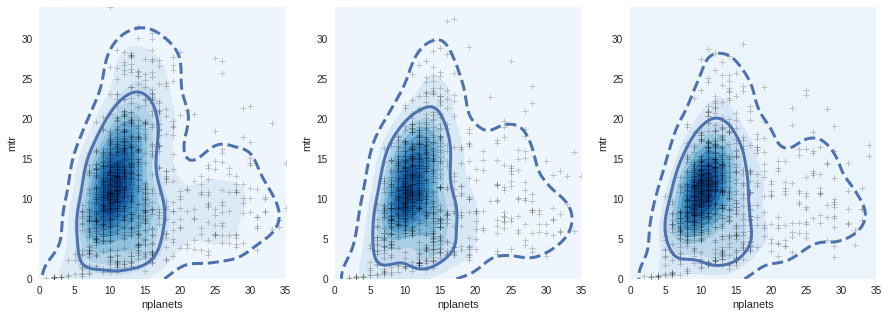

In [397]:
var1='nplanets'
var2='mtr'
xli=(0,35)
yli=(0,34)
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
kdesigplot(dnt,var1,var2,ax1)
ax1.set_xlim(xli)
ax1.set_ylim(yli)
kdesigplot(dlt,var1,var2,ax2)
ax2.set_xlim(xli)
ax2.set_ylim(yli)
kdesigplot(dht,var1,var2,ax3)
ax3.set_xlim(xli)
ax3.set_ylim(yli)

(0, 34)

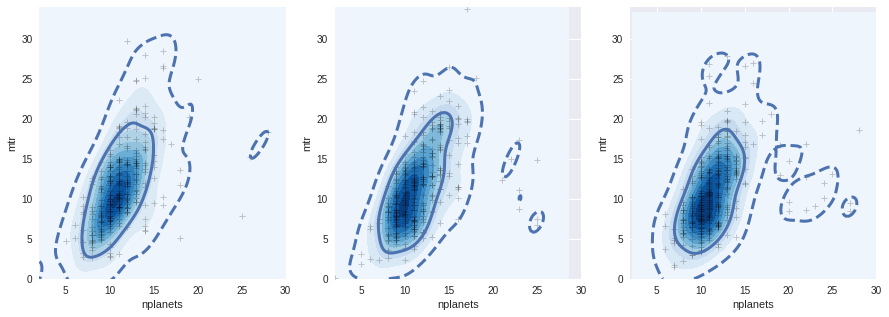

In [401]:
var1='nplanets'
var2='mtr'
xli=(2,30)
yli=(0,34)
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
kdesigplot(dng,var1,var2,ax1)
ax1.set_xlim(xli)
ax1.set_ylim(yli)
kdesigplot(dlg,var1,var2,ax2)
ax2.set_xlim(xli)
ax2.set_ylim(yli)
kdesigplot(dhg,var1,var2,ax3)
ax3.set_xlim(xli)
ax3.set_ylim(yli)

(0.2, 1.4)

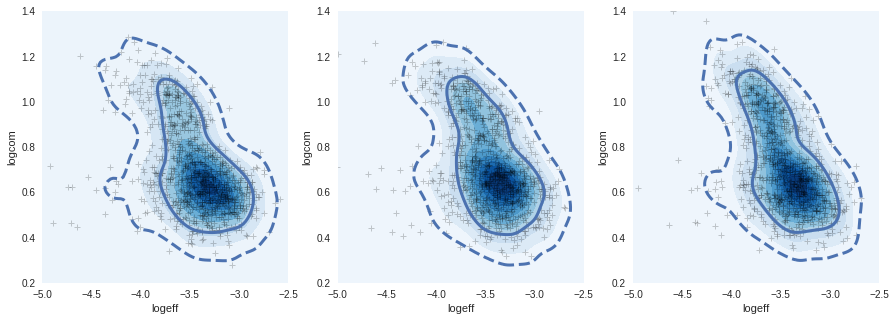

In [351]:
var1='logeff'
var2='logcom'
xli=(-5,-2.5)
yli=(0.2,1.4)
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
kdesigplot(dnt,var1,var2,ax1)
ax1.set_xlim(xli)
ax1.set_ylim(yli)
kdesigplot(dlt,var1,var2,ax2)
ax2.set_xlim(xli)
ax2.set_ylim(yli)
kdesigplot(dht,var1,var2,ax3)
ax3.set_xlim(xli)
ax3.set_ylim(yli)

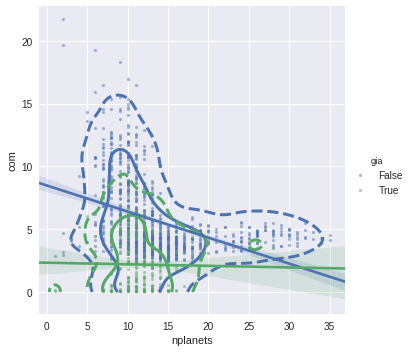

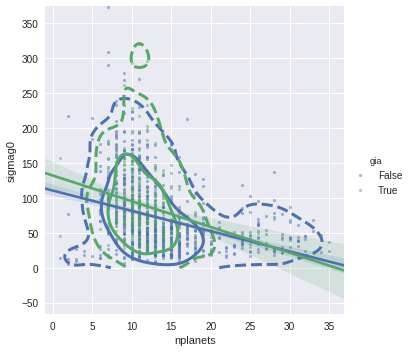

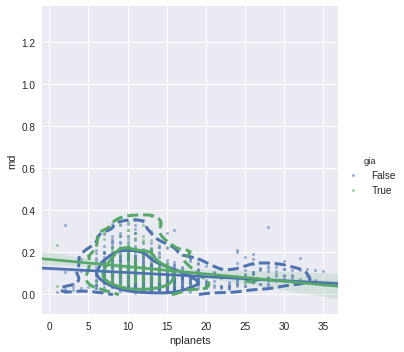

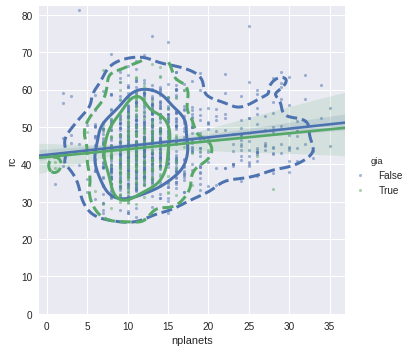

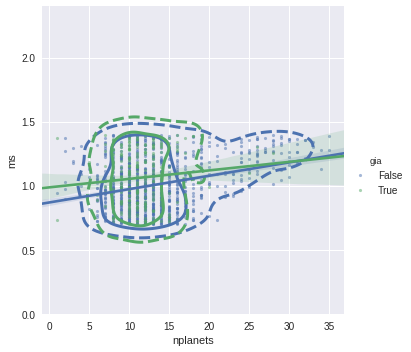

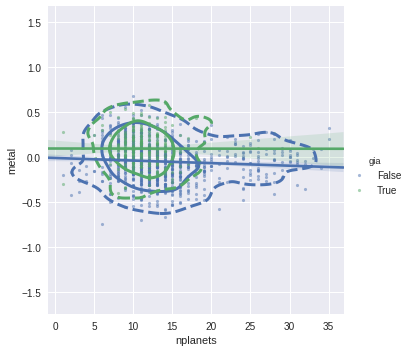

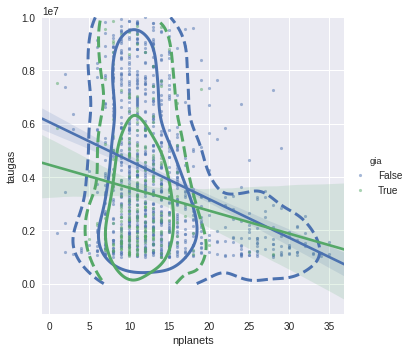

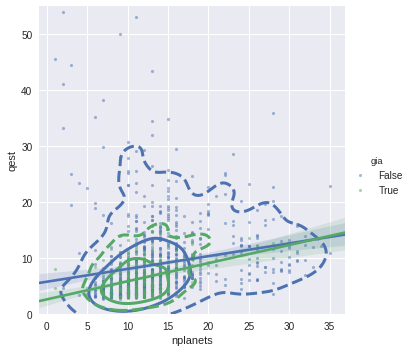

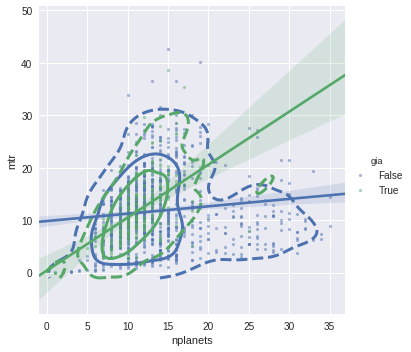

In [407]:
ref="nplanets"
mylist=['com', 'sigmag0', 'md', 'rc', 'ms', 'metal', 'taugas',  'qest','mtr']
df=dn
for i in range(len(mylist)):
    v=[ref,mylist[i]]
    sns.lmplot(x=v[0],y=v[1],data=df,hue="gia", scatter_kws={"s": 10,"alpha":0.5})
    Xmesh,Ymesh,kern,lev=CONTOURP(df[v[0]],df[v[1]])
    plt.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[0]],linestyles=('dashed','solid'))
    Xmesh,Ymesh,kern,lev=CONTOURP(df[v[0]][df.gia],df[v[1]][df.gia])
    plt.contour(Xmesh,Ymesh,kern, levels = lev,linewidths=3,colors=[current_palette[1]],linestyles=('dashed','solid'))


(0.2, 1.5)

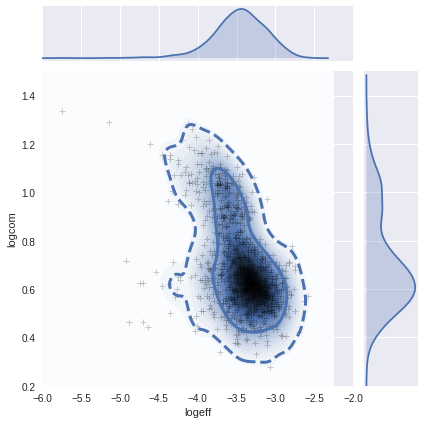

In [349]:
kdesigplt(dnt,'logeff','logcom')
plt.xlim(-6,-2)
plt.ylim(0.2,1.5)

(0, 25)

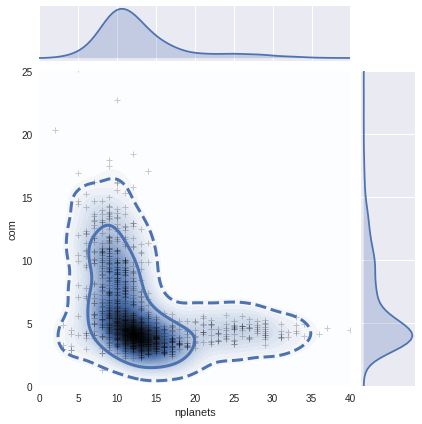

In [194]:
kdesigplt(dht,'nplanets','com')
plt.xlim(0,40)
plt.ylim(0,25)

(-2, 1.5)

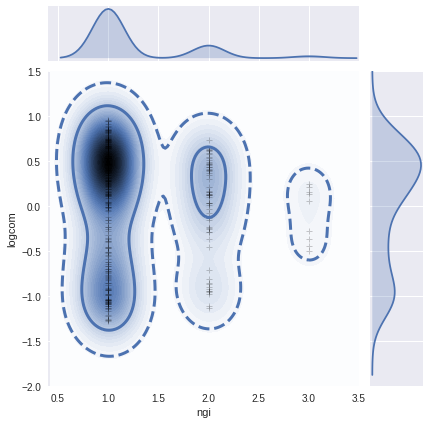

In [210]:
kdesigplt(dhg,'ngi','logcom')
plt.xlim(0.4,3.5)
plt.ylim(-2,1.5)

(0.55, 1.5)

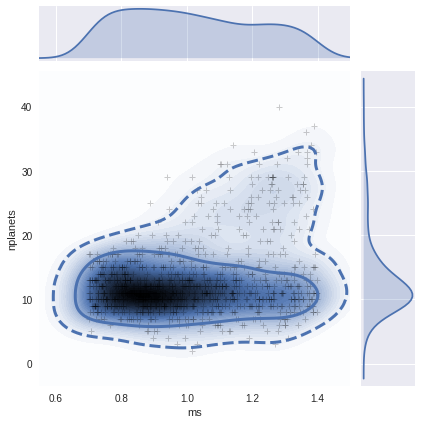

In [206]:
kdesigplt(dht,'ms','nplanets')
plt.xlim(0.55,1.5)

(0, 45)

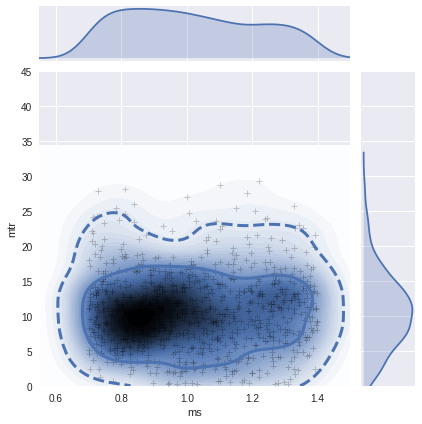

In [208]:
kdesigplt(dht,'ms','mtr')
plt.xlim(0.55,1.5)
plt.ylim(0,45)

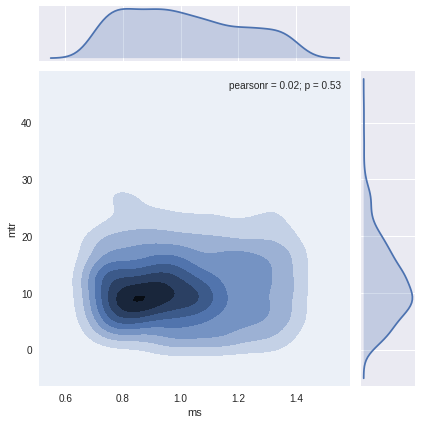

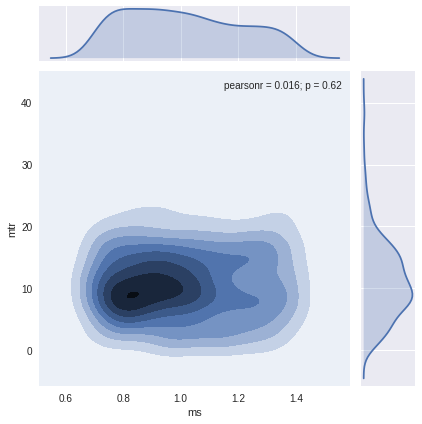

In [353]:
sns.jointplot(dnt.ms,dnt.mtr,kind='kde')
sns.jointplot(dlt.ms,dlt.mtr,kind='kde')

## From here on, no results

In [42]:
from sklearn.neighbors import KernelDensity
from sklearn.grid_search import GridSearchCV

def uni_kde(x,y,tickno=5,nlev=30):
    x_grid=np.around(np.arange(x.min(),x.max(),0.1),2)
    y_grid=np.linspace(y.min(),y.max(),len(x_grid))
    conv=(x.max()-x.min())/(y.max()-y.min())
    yori=y
    y=y*conv
    y_grid=y_grid*conv
    grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(x.min(),x.max()/10,30)},
                    cv=20) # 20-fold cross-validation
    grid.fit(np.vstack([x,y]).T)
    print(grid.best_params_)
    X, Y = np.meshgrid(x_grid, y_grid)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    kde2d = grid.best_estimator_
    pdf2d = np.exp(kde2d.score_samples(xy)).reshape(X.shape)
    plt.figure(figsize=(5,5))
    levels = np.linspace(0, pdf2d.max(), nlev)
    plt.contourf(X, Y, pdf2d, levels=levels, cmap=plt.cm.Reds)
    tickno=5
    old_ticks=np.linspace(y.max(), y.min(), tickno)
    major_ticks = 10**np.linspace(yori.max(), yori.min(), tickno)
    myticks=[]
    for i in major_ticks:
        myticks+=["%.e"%i]
    e=plt.yticks(old_ticks,myticks) 

/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ecci/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'bandwidth': 1.2586206896551724}


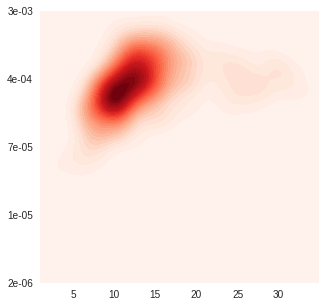

In [43]:
uni_kde(dnt.nplanets,dnt.logeff)

{'bandwidth': 2.0}


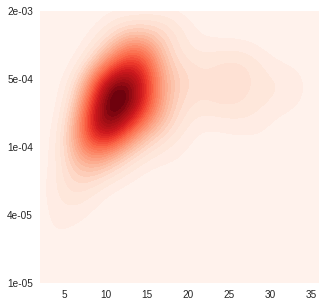

In [45]:
uni_kde(dlt.nplanets,dlt.logeff)

{'bandwidth': 2.0}


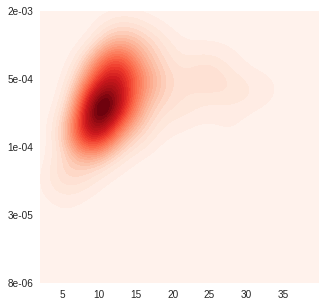

In [46]:
uni_kde(dht.nplanets,dht.logeff)